In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [46]:
#Carregando dataset
data = pd.read_excel("hoteis_tratados.xlsx")
data.columns = data.columns.str.lower()
data

,data_avaliacao,titulo,comentario_positivo,comentario_negativo,nota,hotel
0,2025-02-17,bom,A localização é perfeita e os funcionários são...,Da área de lazer que é pequena e sem uma vista...,10.0,Atlante_Plaza
1,2025-03-30,Pretenso vir oitras vezes,Atrndimento e conforto,Estacionamento pago,10.0,Atlante_Plaza
2,2025-03-29,Excepcional,"Foi excelente!! Tudo muito bom, os funcionário...",NaN,10.0,Atlante_Plaza
3,2025-03-29,Quero voltar!,"Funcionários bem treinados. Agradecemos, espec...",NaN,9.0,Atlante_Plaza
4,2025-03-27,Incrível,Excelente,NaN,10.0,Atlante_Plaza
...,...,...,...,...,...,...
72439,2024-12-28,Excepcional,NaN,NaN,10.0,Vela_Branca
72440,2024-08-14,Aceitável,NaN,NaN,5.0,Vela_Branca
72441,2024-04-12,Aceitável,NaN,NaN,5.0,Vela_Branca
72442,2024-03-26,Excepcional,NaN,NaN,10.0,Vela_Branca


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72444 entries, 0 to 72443
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_avaliacao       72444 non-null  datetime64[ns]
 1   titulo               72444 non-null  object        
 2   comentario_positivo  34665 non-null  object        
 3   comentario_negativo  29024 non-null  object        
 4   nota                 72444 non-null  float64       
 5   hotel                72444 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 3.3+ MB


In [48]:
data['nota'].unique()


array([10. ,  9. ,  7. ,  8. ,  5. ,  4. ,  6. ,  3. ,  1. ,  2. ,  5.8,
        8.3,  6.3,  6.7,  9.2,  9.6])

In [49]:
data['nota'].nunique()


16

C:\Users\TERRA\AppData\Local\Temp\ipykernel_4024\2564559635.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nota_hotel, x='nota', y='hotel', palette='viridis')


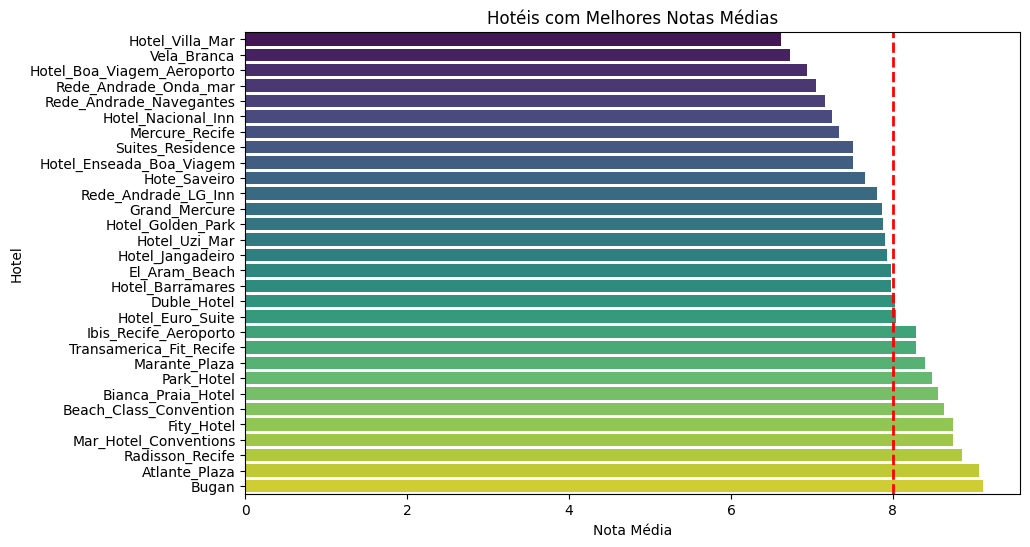

In [50]:
nota_hotel = data.groupby('hotel')['nota'].mean().sort_values().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=nota_hotel, x='nota', y='hotel', palette='viridis')

# Linha vertical vermelha, pontilhada, na posição x = 8
# analise o fato de que a maior parte dos hotéis analisados tirou uma nota média menor que 8

plt.axvline(x=8, color='red', linestyle='--', linewidth=2)

plt.title('Hotéis com Melhores Notas Médias')
plt.xlabel('Nota Média')
plt.ylabel('Hotel')
plt.show()


# depois filtre os hoteis com nota <8 e tente identificar os termos mais recorrentes nos comentários NEGATIVOS
# depois filtre os hoteis com nota >8 e tente identificar os termos mais recorrentes nos comentários POSITIVOS

In [51]:
# Percentual de hoteis com nota < 8
hoteis_baixa_nota = nota_hotel[nota_hotel['nota'] < 8]
porcentagem_baixa_nota = (hoteis_baixa_nota.shape[0] / nota_hotel.shape[0]) * 100
print(f"{porcentagem_baixa_nota:.2f}% dos hotéis possuem nota média abaixo de 8.")

56.67% dos hotéis possuem nota média abaixo de 8.


"Apesar da nota ser em uma escala de 0 a 10, mais de X% dos hotéis avaliados apresentam desempenho abaixo de 8, o que pode indicar uma experiência apenas satisfatória para a maioria dos hóspedes."

C:\Users\TERRA\AppData\Local\Temp\ipykernel_4024\306438799.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comentario_hotel, x='comentario_positivo', y='hotel', palette='viridis')


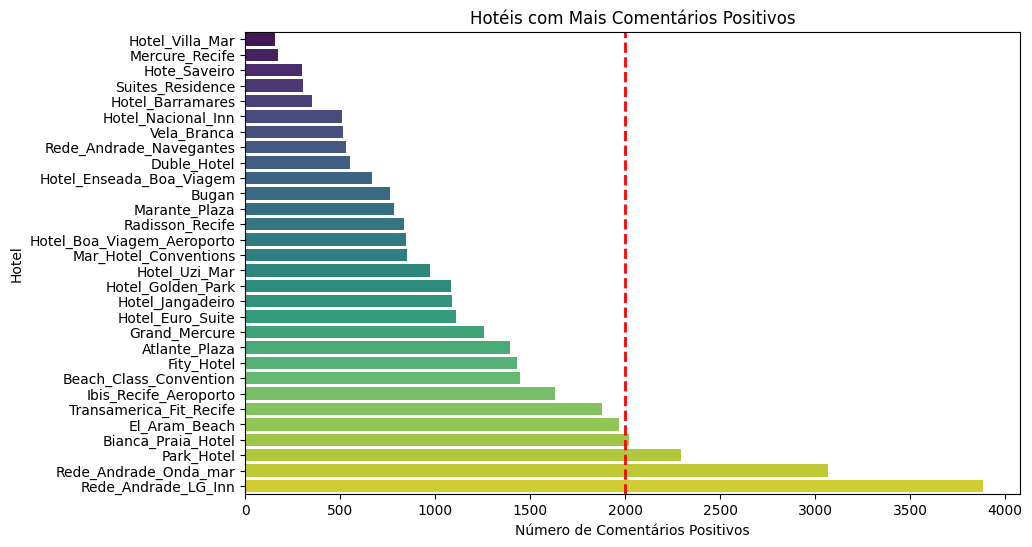

In [ ]:
comentario_hotel = data.groupby('hotel')['comentario_positivo'].count().sort_values().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=comentario_hotel, x='comentario_positivo', y='hotel', palette='viridis')

# Linha vertical vermelha, pontilhada, na posição x = 2000
# analise o fato de que poucos foram os hoteis que obtiveram mais de 2000 comentarios positivos
# e que a maioria dos hoteis tem menos de 2000 comentarios positivos

plt.axvline(x=2000, color='red', linestyle='--', linewidth=2)

plt.title('Hotéis com Mais Comentários Positivos') # CORRIGIR O TITUL0
plt.xlabel('Número de Comentários Positivos')
plt.ylabel('Hotel')
plt.show()


# depois tente fazer uma correlaçõa entre QUANTIDADE DE COMENTARIOS e NOTA MEDIA para ver se existe 
# uma correlação entre o fato de ter uma nota média maior estimula mais comentários positivos



C:\Users\TERRA\AppData\Local\Temp\ipykernel_4024\3107551068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=negativo_hotel, x='comentario_negativo', y='hotel', palette='viridis')


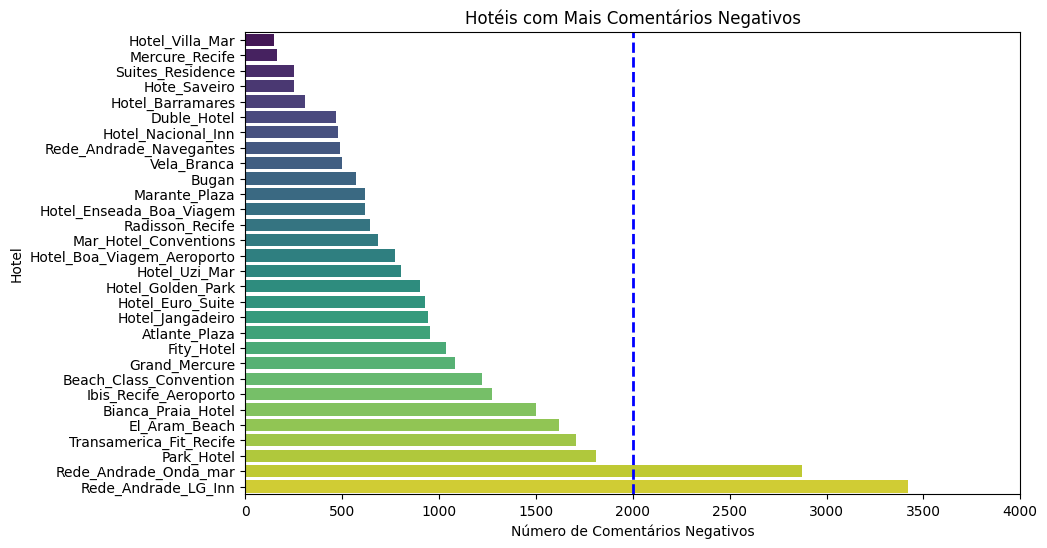

In [53]:
negativo_hotel = data.groupby('hotel')['comentario_negativo'].count().sort_values().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=negativo_hotel, x='comentario_negativo', y='hotel', palette='viridis')
plt.title('Hotéis com Mais Comentários Negativos') # CORRIGIR O TITULO

plt.xlim(0, 4000)                             # Redefinindo o limite do eixo x
                                              # é importante para comparar com o gráfico anterior

plt.axvline(x=2000, color='blue', linestyle='--', linewidth=2)

plt.xlabel('Número de Comentários Negativos')
plt.ylabel('Hotel')
plt.show()




# Analisando esse gráfico vemos que os mesmos 2 hoteis que tiveram mais comentarios POSITIVOS também tiveram mais comentarios NEGATIVOS
# o que isso significa?

In [54]:
#Filtros
notas_baixas = data[data['nota'] < 8]
notas_altas = data[data['nota'] >= 8]

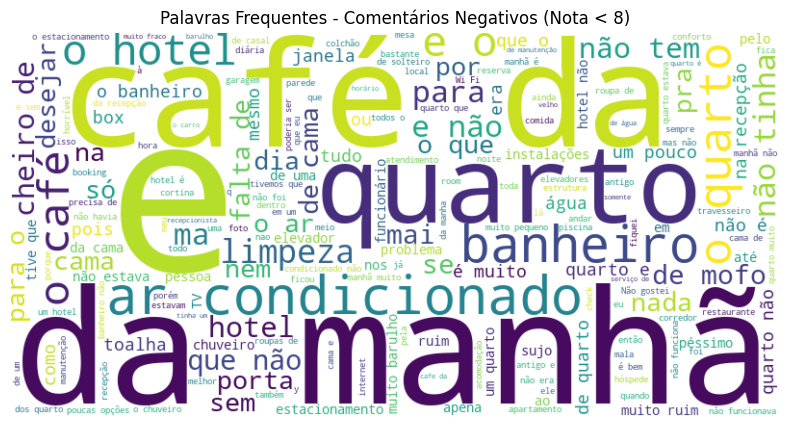

In [55]:

# Comentários negativos (notas baixas)
texto_negativo = ' '.join(notas_baixas['comentario_negativo'].dropna().astype(str))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(texto_negativo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras Frequentes - Comentários Negativos (Nota < 8)')
plt.show()

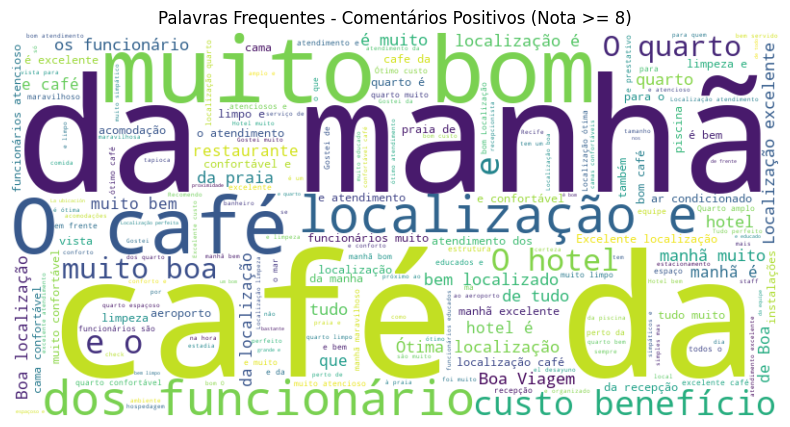

In [56]:
# Comentários positivos (notas altas)
texto_positivo = ' '.join(notas_altas['comentario_positivo'].dropna().astype(str))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(texto_positivo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras Frequentes - Comentários Positivos (Nota >= 8)')
plt.show()

Correlação entre nota média e quantidade de comentários: 0.18


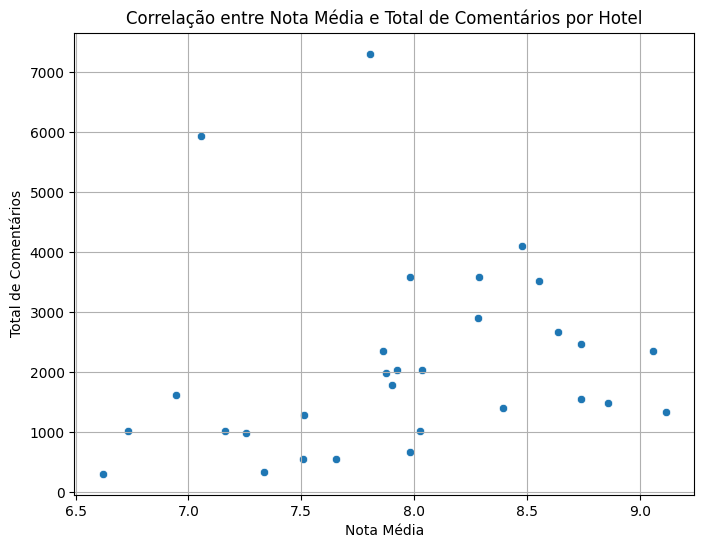

In [57]:
# Quantidade total de comentários por hotel
comentarios_totais = data.groupby('hotel')[['comentario_positivo', 'comentario_negativo']].count()
comentarios_totais['total_comentarios'] = comentarios_totais['comentario_positivo'] + comentarios_totais['comentario_negativo']

# Junta com a média das notas
nota_media = data.groupby('hotel')['nota'].mean()
df_corr = comentarios_totais.join(nota_media)

# Correlação
correlacao = df_corr[['nota', 'total_comentarios']].corr().iloc[0, 1]
print(f"Correlação entre nota média e quantidade de comentários: {correlacao:.2f}")

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_corr, x='nota', y='total_comentarios')
plt.title('Correlação entre Nota Média e Total de Comentários por Hotel')
plt.xlabel('Nota Média')
plt.ylabel('Total de Comentários')
plt.grid(True)
plt.show()


"Os hotéis que concentram o maior número de comentários positivos também aparecem entre os com mais comentários negativos, o que sugere maior visibilidade ou fluxo de hóspedes. Isso pode indicar maior exposição, variação na experiência dos hóspedes ou até mesmo mais tempo de operação."

